# Investigating the Covid Pandemic Impacts on the Gross Domestic Products of G20 Nations

## Introduction

The International Monetary Fund (IMF) keeps data on key economic indicators for countries around the world. The World Economic Outlook (WEO) is a report containing output, inflation, employment, fiscal balances, and debt statistics for participating countries. The IMF works towards sustainable growth for the countries by supporting economic policies that promote financial stability and international monetary cooperation. Which are necessary to increase productivity, job creation, and economic well-being around the globe (International Monetary Fund, 2023). However, in recent years the Coronavirus (COVID-19) pandemic caused countries to implement lockdown measures in response to the pandemic outbreak. Resulting in decreased global economic activity, increased unemployment rates, and lessened service industries (Saira et al., 2022) 

Using the data accumulated from the IMF’s World Economic Outlook database, we will investigate the effect that the three-year COVID-19 pandemic had on the Gross Domestic Product (GDP) per capita for the countries; Australia, China, and Canada. 

GDP is the gross value of the total amount of goods and services made within a specific country during a certain period of time (Imports and Exports, 2023). The following variables we use to predict the GDP per capita are: Inflation average consumer prices percent change, Volume of Exports and Imports, and Employment. The inflation average consumer prices percent change represents shifts in prices experienced by people of the country. It is measured by comparing, through a period of time, how the cost of a fixed basket of goods and services changes (Government of Canada, Statistics Canada, 2023). Another variable, the Employment rate, measures the extent to which people available to work are being used by the country (Employment rate, 2022). Each variable listed is essential to the country's GDP, and all of which were greatly impacted by COVID-19. The relationship between GDP and inflation is delicate. Essentially, GDP growth, in an extensive manner leads to inflation, which thus negatively impacts other factors such as stock gains and corporate profit. Another scenario would be when GDP increases explosively, which causes hyperinflation. This idea details that people tend to spend more when inflation increases as consumers know that their money will be less viable in the future, therefore causing further GDP and inflation increases. In terms of employment, if the economy is in a state of full employment, then the demand for goods and services increases faster than the supply, therefore prices for goods rise, which then forces companies to raise wages as well (Barnes, 2023). Overall, if one-factor increases, the other increases as well. Volume of Imports refers to goods and services purchased from other countries, besides one's own. While the Volume of Exports refers to goods and services made in the country, that are then sold to other countries for a profit (Imports and Exports, 2023). 
Exports and imports play a significant role in calculating a country's GDP which can be seen in the equation: GDP = C + I + G + (X – M). Where, (X - M) represents the net exports, composed of exports (X) and imports (M). The other variables C, I, and G also contribute to the calculation of GDP but will not be discussed as they were not used in our calculations therefore is irrelevant to our project. When exports are greater than imports the net exports are positive, indicating a trade surplus which contributes to a country's economic growth. For example, a company exporting high levels of goods in other words selling goods to other countries results in an influx of money that prompts consumer spending and further contributes to economic growth and an increase in GDP. While imported goods are bought from other countries resulting in money leaving the economy, therefore, decreases the importing nation’s GDP. A healthy economy experiences growth in both exports and imports this demonstrates economic strength and sustainability (Kramer, 2023).

The data collected from the years 2010-2019 are trained to yield a linear regression that will predict GDP per capita for the COVID-19 years; 2020, 2021, 2022, and 2023. We will then compare the predicted values with the actual values found in the World Economic Outlook database for the COVID-19 years.


## Preliminary Exploratory Data Analysis

The free dataset from the International Monetary Fund was downloaded from their offical website, saved into our GitHub repository, and read online into this proposal. The dataset was then wrangled to only contain data relevant to our project, the specific variables and observations are identified in our Methods section below. Additionally, the dataset was tidied following the DSCI 100's 3 criterion for tidy data. A summary table and visualization using training data is also shown below.

In [92]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

In [94]:
G20_economic_data <- read_csv("https://raw.githubusercontent.com/mparhar1/DSCI-100-Group-48-Project/main/WEOApri23G20.csv")
colnames(G20_economic_data) <- make.names(colnames(G20_economic_data), unique = TRUE)

head(G20_economic_data, n=3)

Rows: 836 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (46): ISO, WEO Subject Code, Country, Subject Descriptor, Subject Notes,...
dbl  (2): WEO Country Code, Estimates Start After

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


WEO.Country.Code,ISO,WEO.Subject.Code,Country,Subject.Descriptor,Subject.Notes,Units,Scale,Country.Series.specific.Notes,X1980,⋯,X2020,X2021,X2022,X2023,X2024,X2025,X2026,X2027,X2028,Estimates.Start.After
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
213,ARG,NGDP_R,Argentina,"Gross domestic product, constant prices","Expressed in billions of national currency units; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,Source: National Statistics Office Latest actual data: 2021 National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices Reporting in calendar year: Yes Start/end months of reporting year: January/December Base year: 2004 Chain-weighted: No Primary domestic currency: Argentine peso Data last updated: 03/2023,357.389,⋯,624.295,689.211,725.346,726.797,741.333,756.161,771.287,786.714,802.448,2021
213,ARG,NGDP_RPCH,Argentina,"Gross domestic product, constant prices","Annual percentages of constant price GDP are year-on-year changes; the base year is country-specific. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",Percent change,NA,"See notes for: Gross domestic product, constant prices (National currency).",0.7,⋯,-9.943,10.398,5.243,0.2,2,2,2,2,2,2021
213,ARG,NGDP,Argentina,"Gross domestic product, current prices","Expressed in billions of national currency units. Expenditure-based GDP is total final expenditures at purchasers' prices (including the f.o.b. value of exports of goods and services), less the f.o.b. value of imports of goods and services. [SNA 1993]",National currency,Billions,Source: National Statistics Office Latest actual data: 2021 National accounts manual used: System of National Accounts (SNA) 2008 GDP valuation: Market prices Reporting in calendar year: Yes Start/end months of reporting year: January/December Base year: 2004 Chain-weighted: No Primary domestic currency: Argentine peso Data last updated: 03/2023,--,⋯,27481.440,46282.070,"82,650.24","164,655.09","268,792.37","403,024.96","584,085.98","817,219.74","1,104,151.70",2021


In [95]:
tidy_G20_economic_data <- G20_economic_data |>
    select(Country,
           Subject.Descriptor,
           Units,
           X2010:X2023
          ) |>
    filter(Subject.Descriptor == "Gross domestic product per capita, current prices" & Units == "U.S. dollars" |
           Subject.Descriptor == "Volume of imports of goods and services" |
           Subject.Descriptor == "Volume of exports of goods and services" | 
           Subject.Descriptor == "Inflation, average consumer prices" & Units == "Percent change" |
           Subject.Descriptor == "Unemployment rate" 
          ) |>
    filter(Country != "Argentina" & Country != "Saudi Arabia") |>
    mutate(X2014 = as.numeric(gsub(",","", X2014)),
           X2015 = as.numeric(gsub(",","", X2015)),
           X2016 = as.numeric(gsub(",","", X2016)),
           X2022 = as.numeric(gsub(",","", X2022)),
           X2023 = as.numeric(gsub(",","", X2023)),
          ) |>
    pivot_longer(cols = X2010:X2023,
                 names_to = "Year",
                 values_to = "Metric"
                ) |>
    group_by(Country, Year, Subject.Descriptor) |>
    summarise(Metric = mean(Metric, na.rm = TRUE)) |>
    pivot_wider(names_from = Subject.Descriptor,
                values_from = Metric
               )

colnames(tidy_G20_economic_data) <- make.names(colnames(tidy_G20_economic_data), unique = TRUE)

head(tidy_G20_economic_data)

`summarise()` has grouped output by 'Country', 'Year'. You can override using
the `.groups` argument.


Country,Year,Gross.domestic.product.per.capita..current.prices,Inflation..average.consumer.prices,Unemployment.rate,Volume.of.exports.of.goods.and.services,Volume.of.imports.of.goods.and.services
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,X2010,56579.03,2.863,5.208,5.709,16.142
Australia,X2011,67270.36,3.356,5.083,-0.144,10.557
Australia,X2012,68450.31,1.686,5.233,5.420,6.183
Australia,X2013,65200.37,2.450,5.658,5.890,-2.284
Australia,X2014,61615.05,2.513,6.058,7.010,-1.410
Australia,X2015,51412.25,1.485,6.050,6.319,2.265


Country,mean_gdp
<chr>,<dbl>
Australia,58874.708
Brazil,10727.808
Canada,48066.366
China,7589.821
France,42013.763
Germany,44992.377
India,1654.561
Indonesia,3682.902
Italy,34305.552


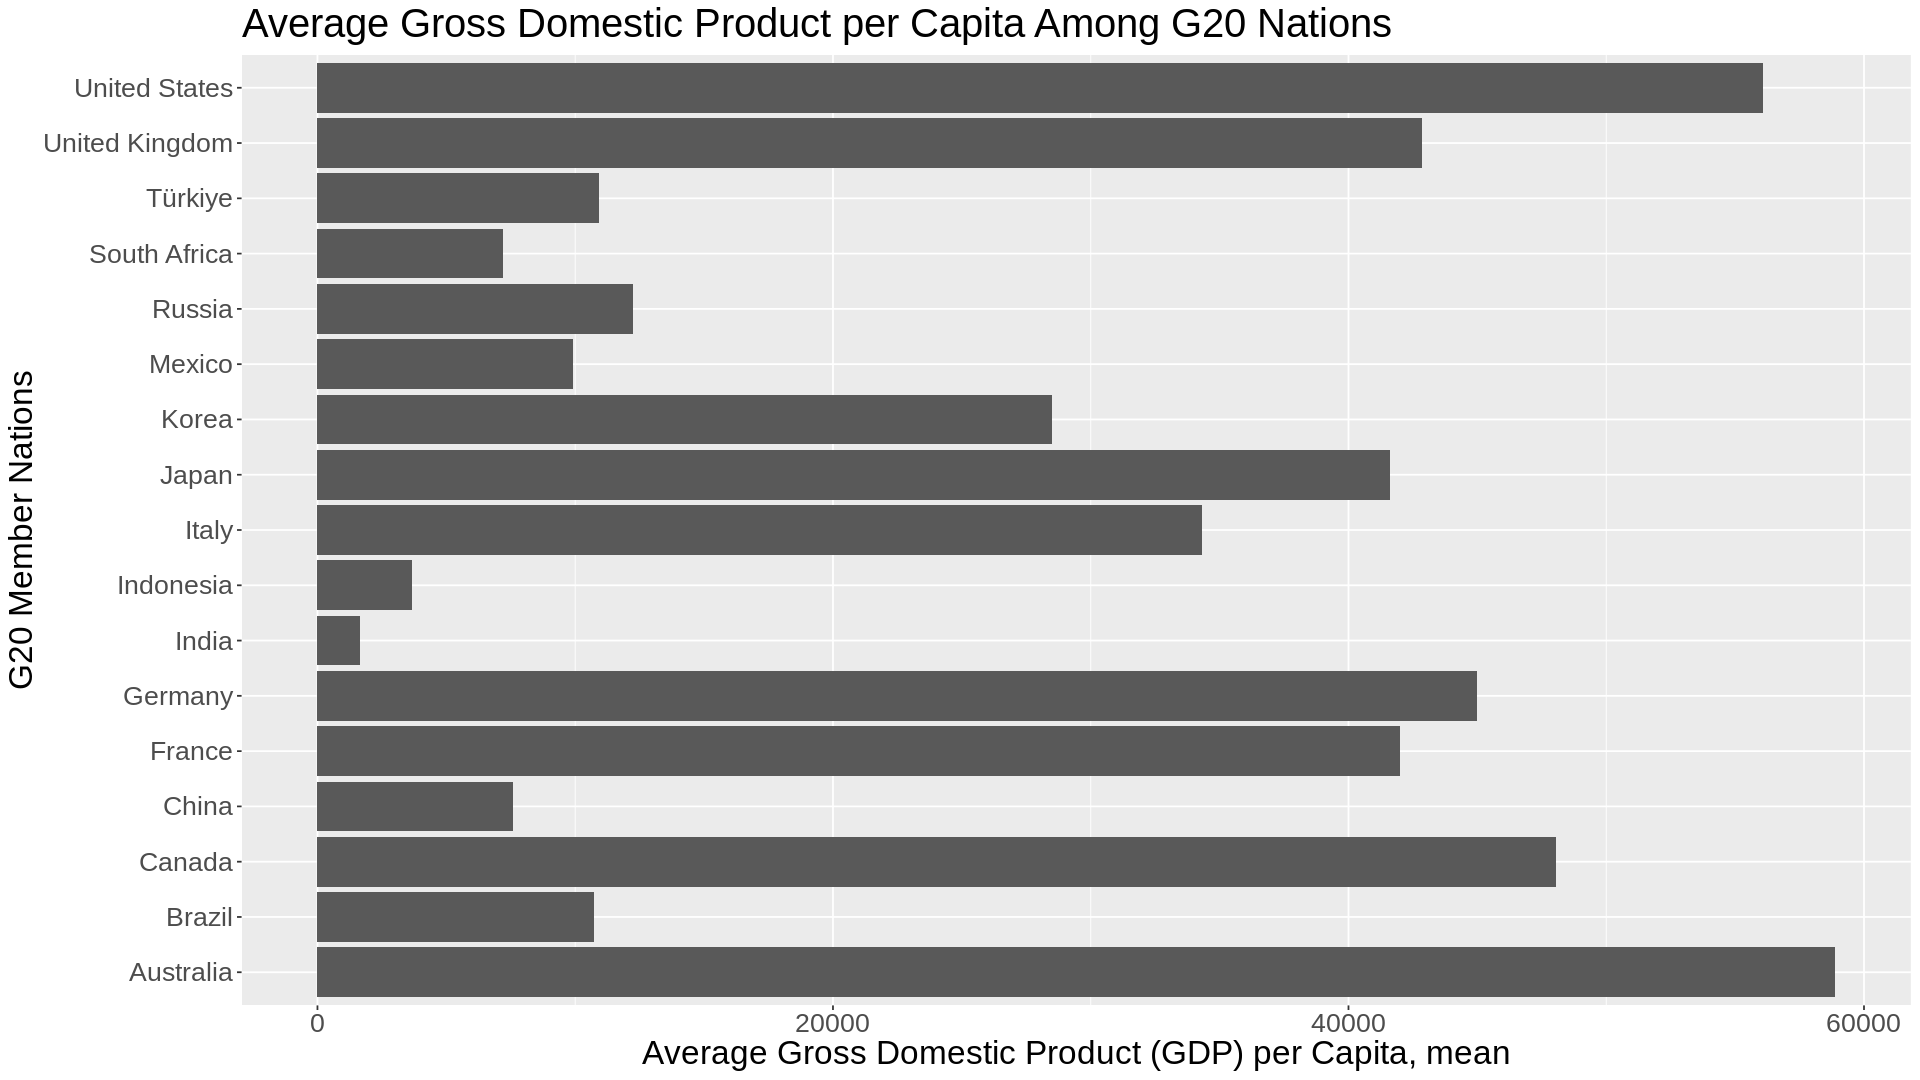

In [112]:
econ_training_data <- tidy_G20_economic_data |>
    filter(Year >= "X2010" & Year <= "X2019")

econ_testing_data <- tidy_G20_economic_data |>
    filter(Year >= "X2020" & Year <= "X2023")

gdp_means_by_nation <- econ_training_data |>
    group_by(Country) |>
    summarise(mean_gdp = mean(Gross.domestic.product.per.capita..current.prices))

options(repr.plot.width = 16, repr.plot.height = 9)
gdp_plot <- ggplot(gdp_means_by_nation, aes(x = Country, y = mean_gdp)) +
    geom_bar(stat = "identity") +
    ggtitle("Average Gross Domestic Product per Capita Among G20 Nations") +
    xlab("G20 Member Nations") +
    ylab("Average Gross Domestic Product (GDP) per Capita, mean") +
    coord_flip() +
    theme(text = element_text(size = 20))

gdp_means_by_nation
gdp_plot

## Methods

The variables we’ll use to predict Gross domestic product per capita (GDP), current prices ($USD) are: volume of imports of goods and services, volume of exports of goods and services, inflation average consumer prices and the variable unemployment; which we will mutate into an employment variable.

To visualize our results we’ll be plotting the data into nineteen separate grids each representing a line graph for its respective country (*note:* the Eurpean Union (EU) is a G20 member but will not be examined as its GDP is more complicated, and Argentina and Saudi Arabia will not be examined as they did not have complete data), with the year as the x-axis and GDP in the y-axis. 

## Expected Outcomes and Significance

We expect to find that the COVID pandemic caused a decrease in GDP per capita of G20 countries. For example, the variable, Volume of Goods and Services imported and exported and Employment, was seen to decline amidst the pandemic. Whilst Inflation has risen, thus consumption lessens, leading to a decrease in GDP per capita.

Our findings provide us a better understanding of the impact of the COVID pandemic. It helps us visualise how necessary each variable is in our way of life. Further, our findings could predict how the economy will be impacted from future devastations, and better prepare us for what is to come.

Some questions could include, whether in this new era, where the world is gradually healing from COVID, could the data used, still be able to predict the GDP of years to come?